In [1]:
#Q1

import pandas as pd

# Read the dataframe from the CSV file
df = pd.read_csv('spotify.csv')

# Check for null values in the dataframe
print("Checking for null values:")
print(df.isnull().sum())


# Check for duplicate rows
print("\nChecking for duplicate rows:")
print(df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Print the cleaned dataframe
print("\nCleaned DataFrame:")
print(df.head())

# Save the cleaned dataframe (optional)
# df.to_csv('cleaned_spotify.csv', index=False)


Checking for null values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Checking for duplicate rows:
27

Cleaned DataFrame:
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


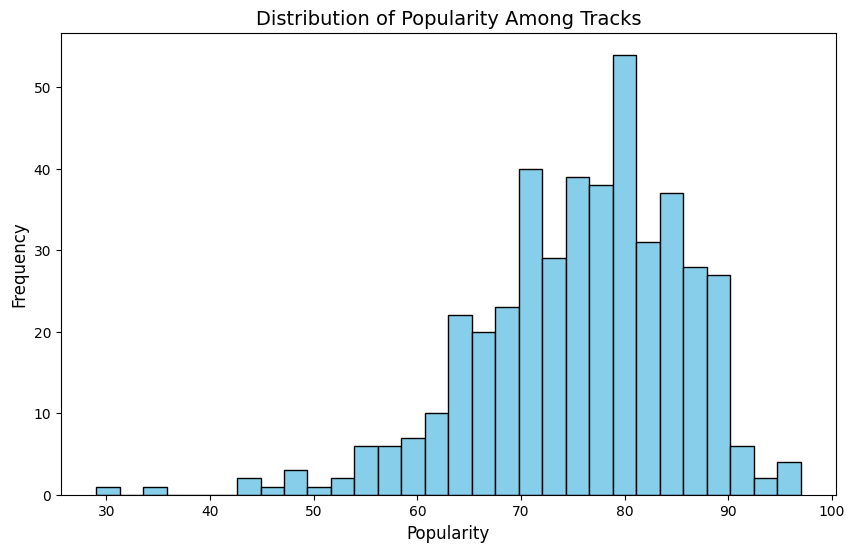

In [2]:
#Q2
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataframe from the CSV file
df = pd.read_csv('spotify.csv')

# Plot the distribution of popularity
plt.figure(figsize=(10,6))
plt.hist(df['Popularity'], bins=30, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Popularity Among Tracks', fontsize=14)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


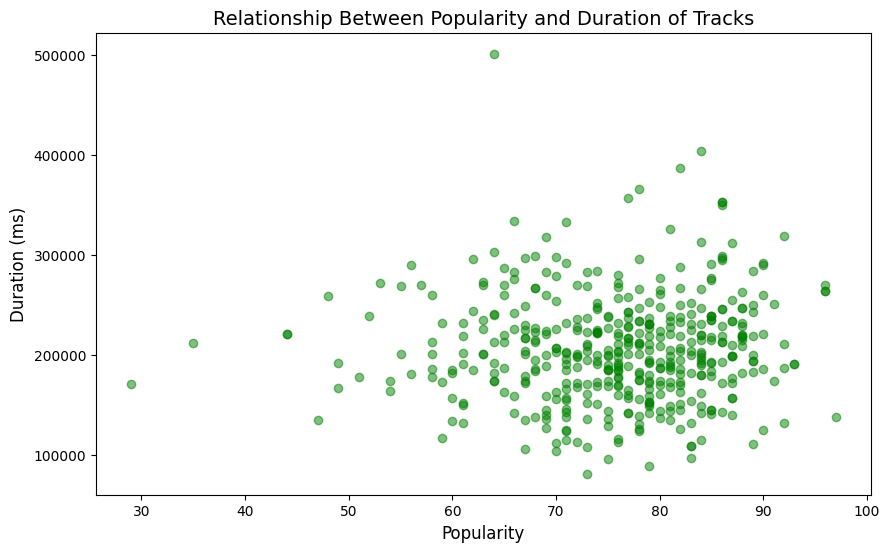

In [3]:
#Q3
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataframe from the CSV file
df = pd.read_csv('spotify.csv')

# Plot the relationship between popularity and duration
plt.figure(figsize=(10,6))
plt.scatter(df['Popularity'], df['Duration (ms)'], alpha=0.5, color='green')

# Add title and labels
plt.title('Relationship Between Popularity and Duration of Tracks', fontsize=14)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Duration (ms)', fontsize=12)

# Show the plot
plt.show()


<ipython-input-11-75b0a8f88a57>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Artist', order=df['Artist'].value_counts().index, palette='viridis')


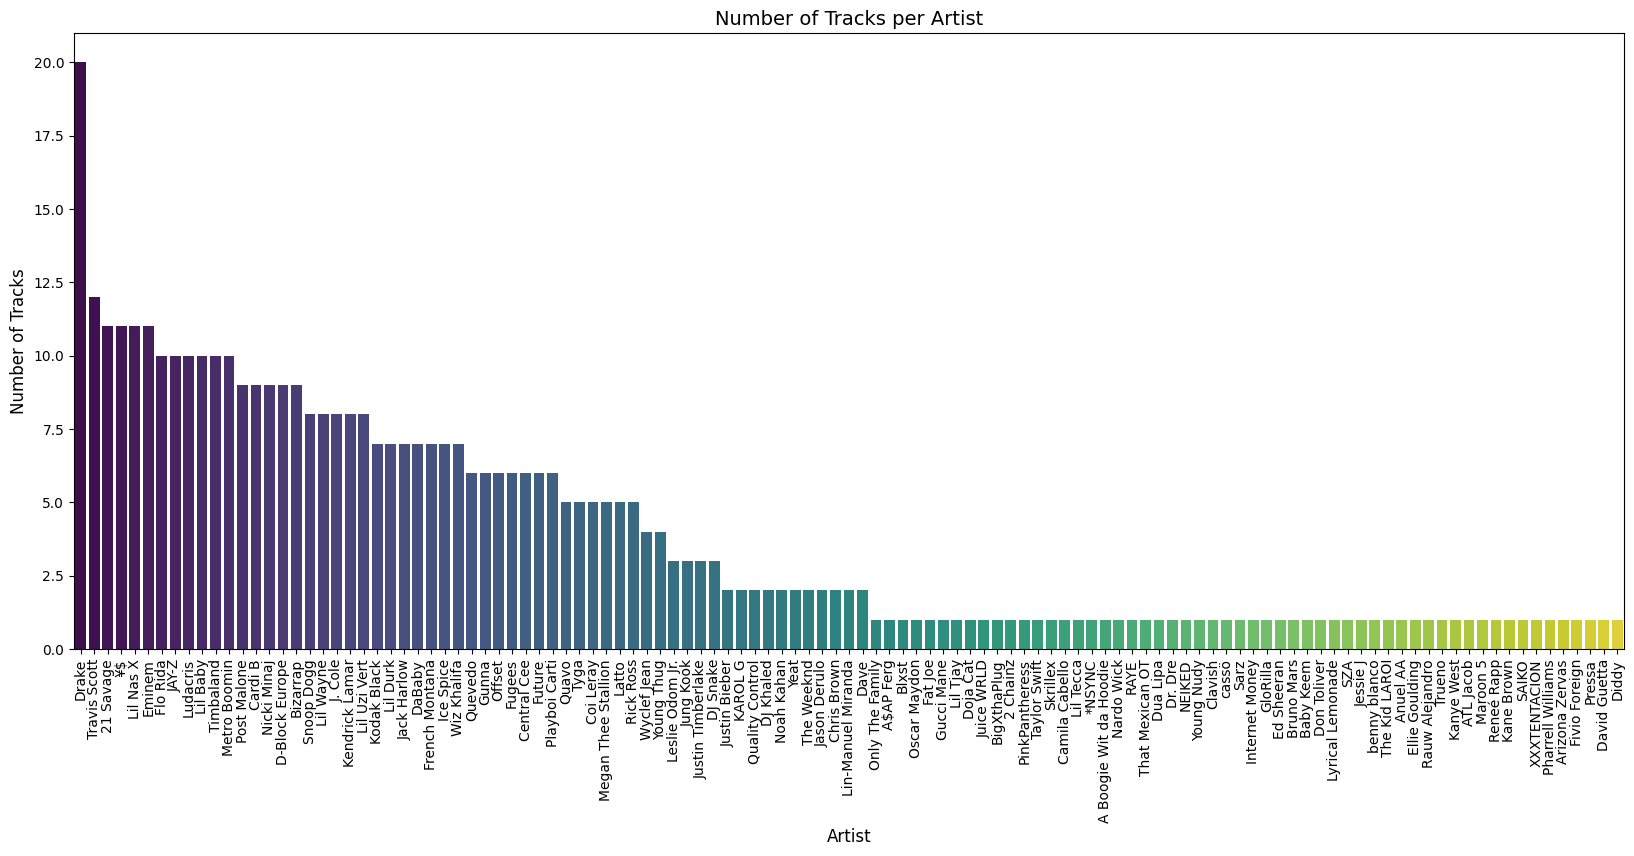

The artist with the highest number of tracks is 'Drake' with 20 tracks.


In [11]:
#Q4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataframe from the CSV file
df = pd.read_csv('spotify.csv')

# Create a countplot to show the number of tracks for each artist
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='Artist', order=df['Artist'].value_counts().index, palette='viridis')

# Add title and labels
plt.title('Number of Tracks per Artist', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

# Display the artist with the highest number of tracks
artist_with_most_tracks = df['Artist'].value_counts().idxmax()
track_count = df['Artist'].value_counts().max()
print(f"The artist with the highest number of tracks is '{artist_with_most_tracks}' with {track_count} tracks.")


In [5]:
#Q5

# Sort the dataframe by 'Popularity' column in ascending order to get the least popular tracks
least_popular_tracks = df[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity').head(5)

# Display the top 5 least popular tracks
print(least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
435  French Montana                Splash Brothers          44
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [6]:
#Q6

# Group the data by 'Artist' and calculate the average popularity for each artist
artist_avg_popularity = df.groupby('Artist')['Popularity'].mean()

# Sort the artists by average popularity in descending order
top_5_artists = artist_avg_popularity.sort_values(ascending=False).head(5)

# Display the average popularity for each of the top 5 artists
print(top_5_artists)


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64


In [7]:
#Q7

# Group the data by 'Artist' and sort the tracks by popularity within each group
top_5_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

# For each of the top 5 artists, find the track with the highest popularity
most_popular_tracks = df[df['Artist'].isin(top_5_artists.index)]
most_popular_tracks = most_popular_tracks.loc[most_popular_tracks.groupby('Artist')['Popularity'].idxmax()]

# Display the artist and their most popular track
for index, row in most_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Most Popular Track: {row['Track Name']}")


Artist: David Guetta, Most Popular Track: Baby Don't Hurt Me
Artist: Travis Scott, Most Popular Track: FE!N (feat. Playboi Carti)
Artist: Trueno, Most Popular Track: Mamichula - con Nicki Nicole
Artist: cassö, Most Popular Track: Prada
Artist: ¥$, Most Popular Track: CARNIVAL


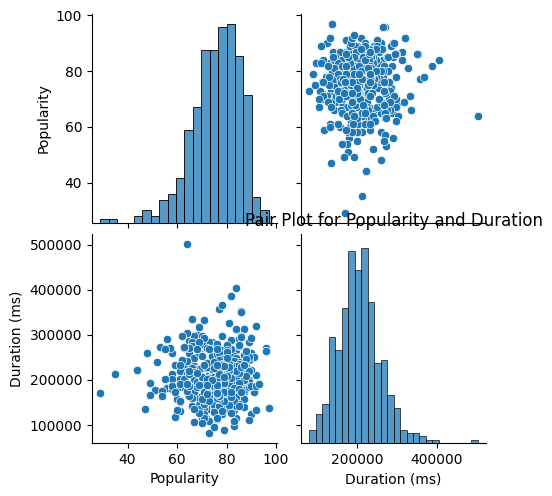

In [8]:
#Q8

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for pair plot
numerical_columns = ['Popularity', 'Duration (ms)']

# Generate pair plot
sns.pairplot(df[numerical_columns])
plt.title('Pair Plot for Popularity and Duration')
plt.show()


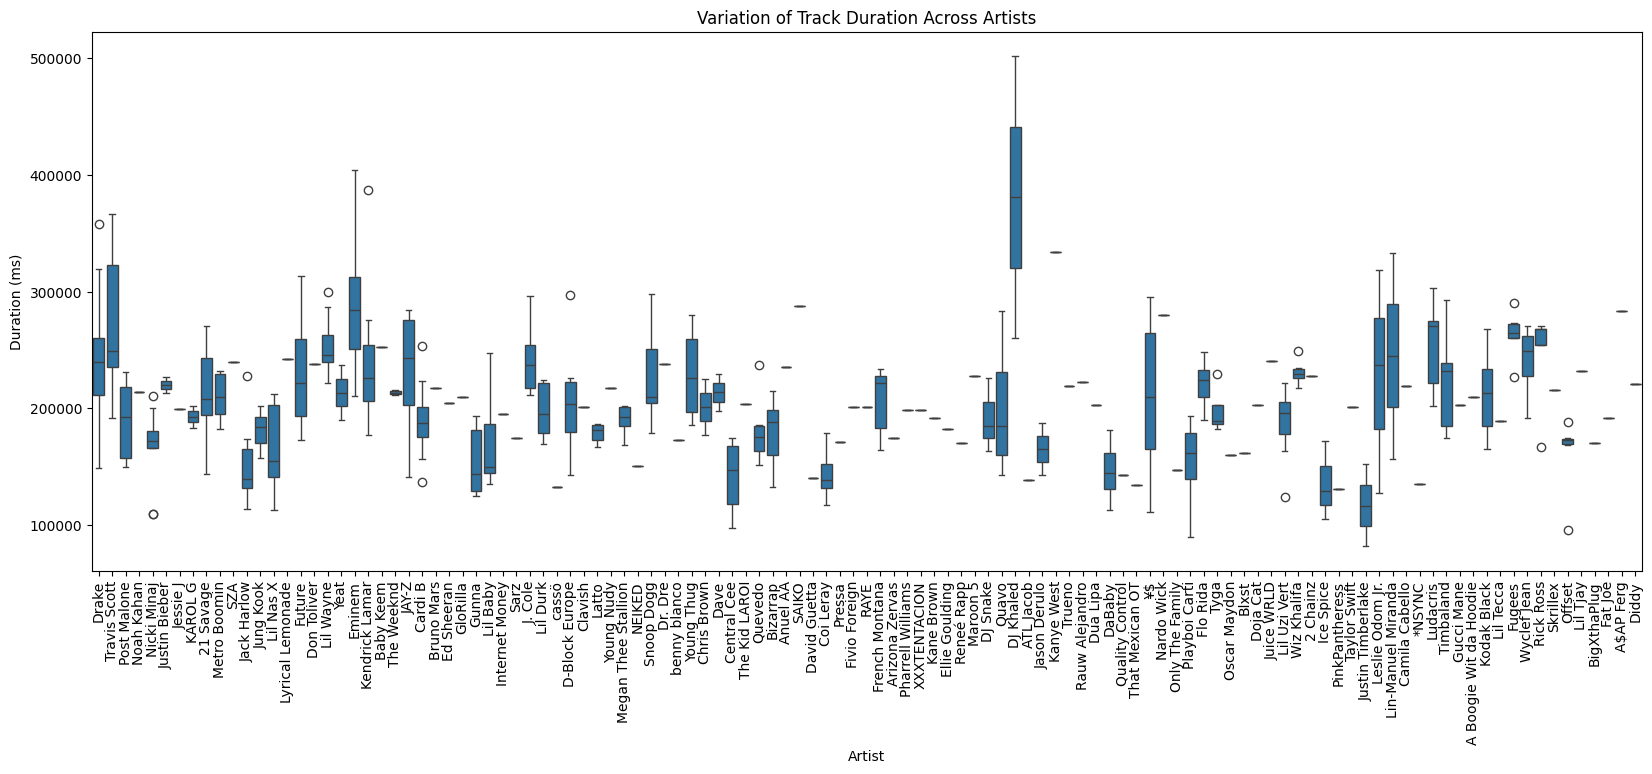

In [10]:
#Q9

#Box Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to show track duration variation across artists
plt.figure(figsize=(20, 7))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Variation of Track Duration Across Artists')
plt.xticks(rotation=90)  # Rotate artist names for readability
plt.show()


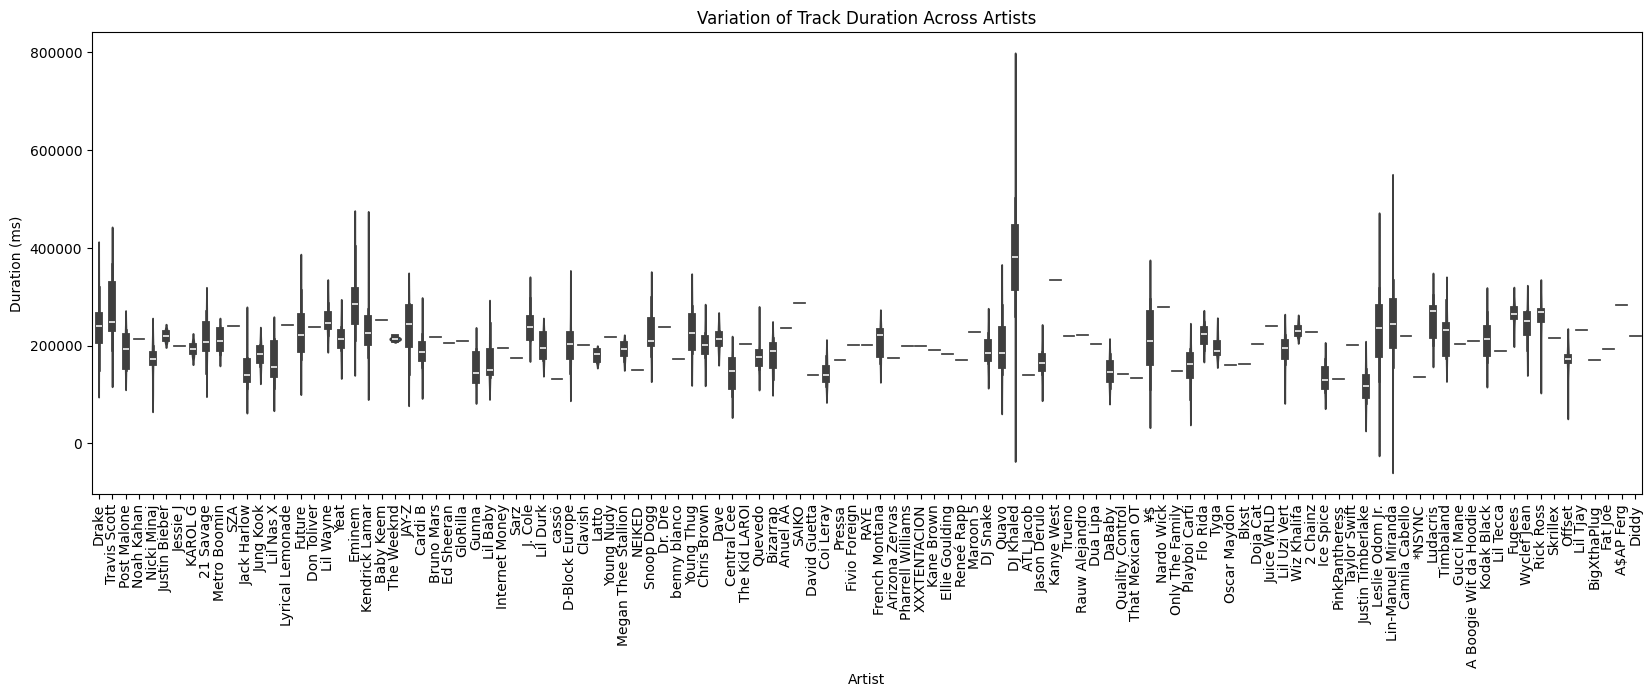

In [13]:
#Q9

#Violin Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot to show track duration variation across artists
plt.figure(figsize=(20, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Variation of Track Duration Across Artists')
plt.xticks(rotation=90)  # Rotate artist names for readability
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be plac

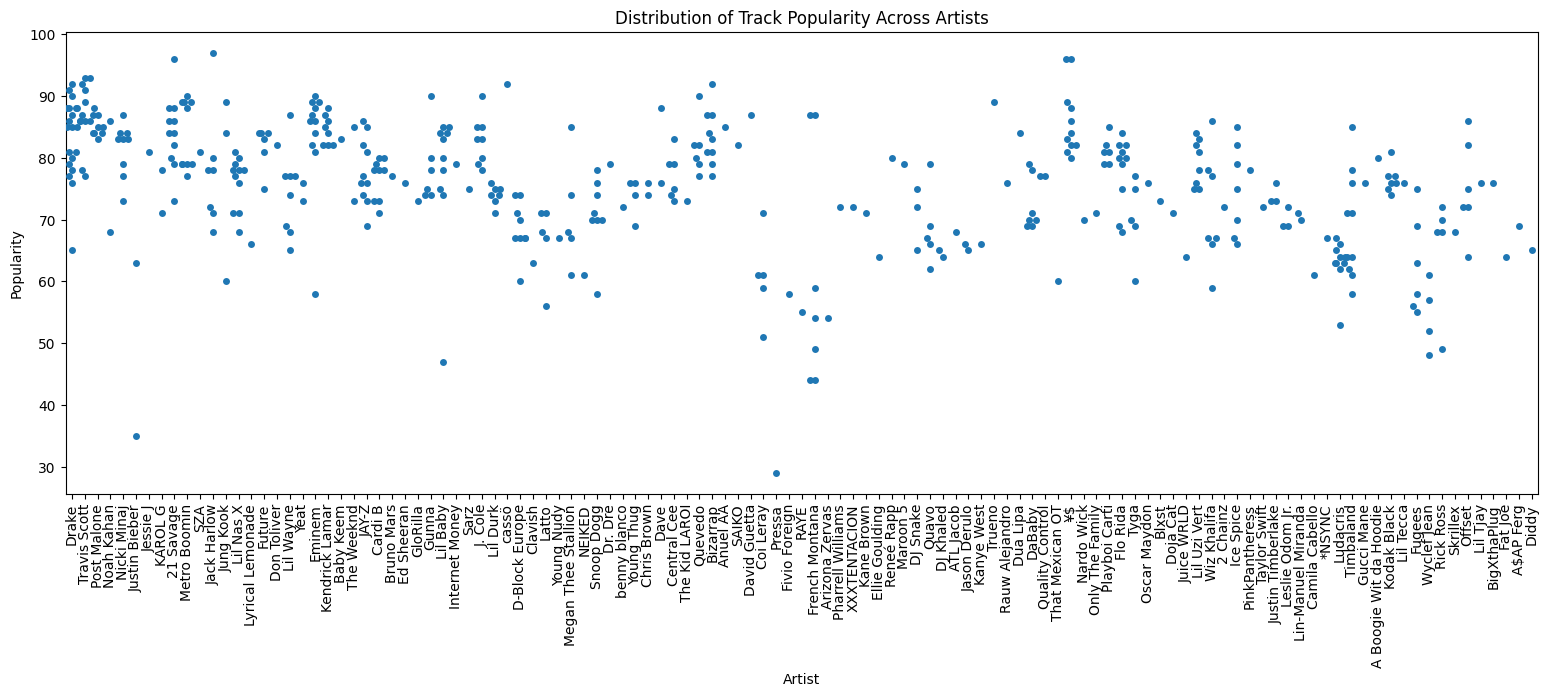

In [15]:
#Q10

#Swarmplot

import seaborn as sns
import matplotlib.pyplot as plt

# Create a swarm plot to show the distribution of track popularity across artists
plt.figure(figsize=(19, 6))
sns.swarmplot(x='Artist', y='Popularity', data=df)
plt.title('Distribution of Track Popularity Across Artists')
plt.xticks(rotation=90)  # Rotate artist names for readability
plt.show()


<ipython-input-20-e675c70198c2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity', data=df , palette = "viridis")


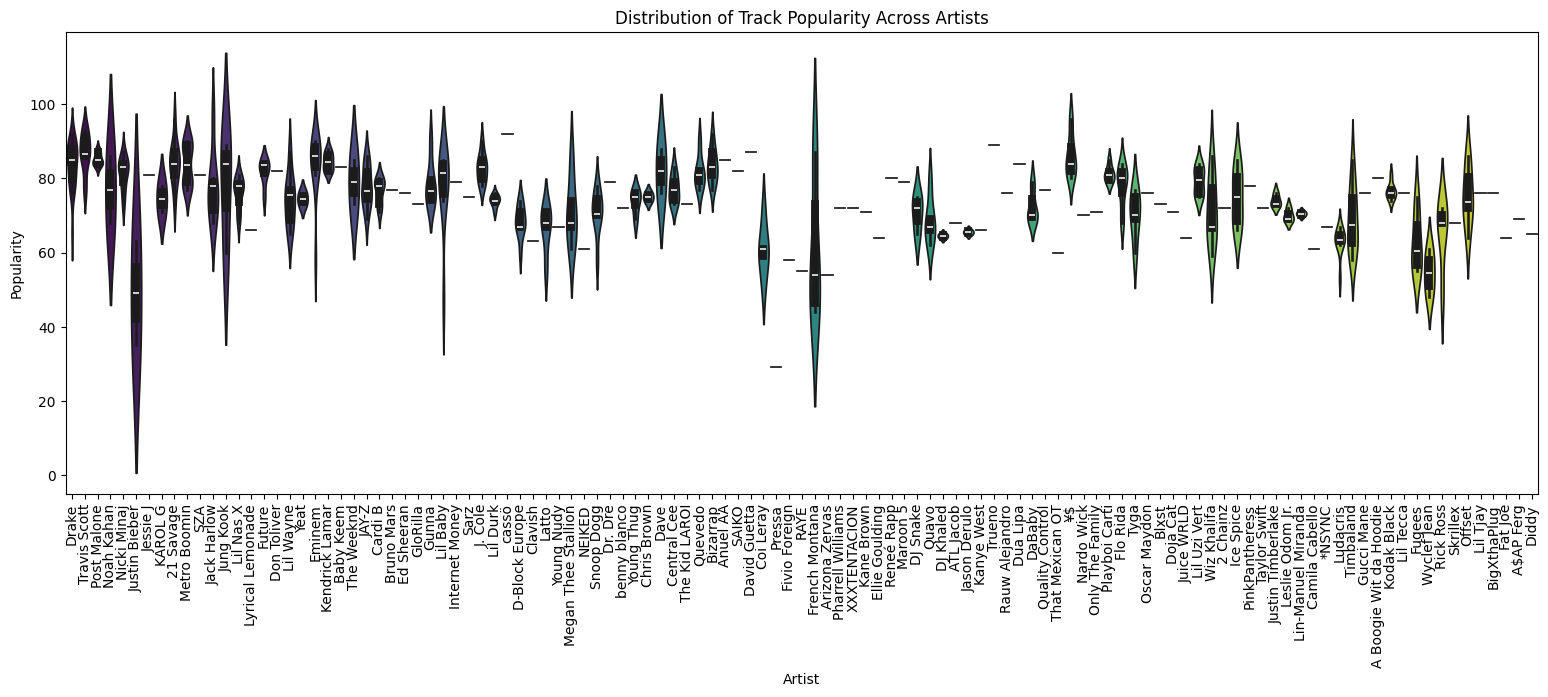

In [20]:
#Q10

#ViolinPlot

import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot to show the distribution of track popularity across artists
plt.figure(figsize=(19, 6))
sns.violinplot(x='Artist', y='Popularity', data=df , palette = "viridis")
plt.title('Distribution of Track Popularity Across Artists')
plt.xticks(rotation=90)  # Rotate artist names for readability
plt.show()
